# Vertical analzsis of Temperature T, Relative Humidity RH and their changes DT and DRH

For the T and RH Plots the used timeframe is from 2010-2020,

For the DT and DRH Plots the difference between the period 2010-2020 and 1980-1990 is  displayed.


In [2]:
import os


# load stuff:
from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

#import cartopy.crs as ccrs

from xhistogram.xarray import histogram

In [3]:
#load Datasets
#SETNAME="MERRA2"
SETNAME="JRA-55"
#Global Params

if SETNAME=="MERRA2":
    FILES="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_PS,RH,T/MERRA2_*"
    RESLOC = '../Results/'
    RESLOC_SPECIFIC = 'MERRA2_RH/'
    DATALOC_SPECIFIC = '/MERRA2_instM_3d_asm_Np_PS,RH,T/'
    DATALOC = '../../../../../../work/mh0066/m301053/Data' + DATALOC_SPECIFIC
    
elif SETNAME=="JRA-55":
    FILES="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric/anl*"
    RESLOC = '../VerticalAnalysis/'
    RESLOC_SPECIFIC = ''
    DATALOC_SPECIFIC = '/JRA-55_Monthly_1.25_Deg_isobaric/'
    DATALOC = '../../../../../../work/mh0066/m301053/Data' + DATALOC_SPECIFIC
else:
    raise Exception("Sorry, notexisting Setname")

INT_RES_Specific = SETNAME + '/'
INT_RES='../Interim_Results/VerticalAnalysis/' + INT_RES_Specific
#What parts of the Notebook should run?
TOPOANALYSIS=True

MASKELEVATION=True
SURFACEVALUES=True

#Times for analysis
t1_start='1980-01-01'
t1_end='1989-12-01'
t2_start='2010-01-01'
t2_end='2019-12-01'

print(os.path.isdir(INT_RES))

True


In [4]:
DS = Dataset(files=FILES, setname = SETNAME, dataloc = DATALOC)

Loading full dataset JRA-55
[########################################] | 100% Completed | 20.86 s
<xarray.Dataset>
Dimensions:  (time: 504, lon: 288, lat: 145, p: 37)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 7.0 5.0 3.0 2.0 1.0
Data variables:
    RH       (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
    T        (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jul 03 15:11:16 2023: cdo -f nc --eccodes copy anl_p125...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...


In [5]:
if MASKELEVATION==True:
    DS_2D = Dataset(files='../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface/*pres.nc', setname = 'JRA-55_2D', dataloc = '../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface/')
    DS.ds = elevation2nan( DS.ds, DS_2D.ds )
    print(DS.ds)

Loading full dataset JRA-55_2D
[########################################] | 100% Completed | 1.01 ss
<xarray.Dataset>
Dimensions:  (time: 480, lon: 288, lat: 145)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    SP       (time, lat, lon) float32 dask.array<chunksize=(480, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jul 11 15:58:11 2023: cdo -f nc --eccodes copy anl_surf...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
<xarray.Dataset>
Dimensions:  (time: 480, p: 37, lat: 145, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.

In [6]:
# =======================================================================
#Initilize topography analysis
if TOPOANALYSIS==True:
    TOPO = Dataset(files="../../../../../../work/mh0066/m301053/Data/Topo/topo_r720x360.nc", setname = 'TOPO', dataloc = '../../../../../../work/mh0066/m301053/Data/Topo/')
    TOPO.land_mask = xr.where(TOPO.ds.topo >= 0.0, True, False)
    
    # Reindex the land mask to match the climate data grid
    TOPO.land_mask_reindexed = TOPO.land_mask.reindex_like(DS.ds, method='nearest')
    print(TOPO.land_mask_reindexed)
    #TOPO.ds.where(TOPO.land_mask_reindexed==False).topo.plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_elevation,cbar_kwargs= cbar_kwargs) for ocean


Loading full dataset TOPO
[########################################] | 100% Completed | 101.45 ms
<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    topo     (lat, lon) float32 dask.array<chunksize=(360, 720), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 05 16:46:47 2023: cdo -f nc topo,r720x360 topo_r720...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...
<xarray.DataArray 'topo' (lat: 145, lon: 288)>
dask.array<getitem, shape=(145, 288), dtype=bool, chunksize=(145, 288), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.7

In [20]:
# =======================================================================
#A nice Plot function
#plt.rcParams['axes.grid'] = True

def update_norm(vmin,vmax,vcentner=0):
    global norm
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcentner, vmax=vmax)


def startfig(title):

    cols = ['Mask {}'.format(col) for col in ['Land','Ocean']]
    rows = ['Season {}'.format(row) for row in ['DJF', 'MAM', 'JJA', 'SON']]

    fig, axes = plt.subplots(nrows=4, ncols=2, 
                             figsize=(12, 12),
                             sharex=True, sharey=True,
                             constrained_layout=True,
                            )

    plt.setp(axes.flat, xlabel='X-label', ylabel='Y-label')

    fig.suptitle(f'Vertical analysis ({title})',size='x-large',)

    pad = 5 # in points

    for ax, col in zip(axes[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                   )

    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center',
                   )
    
    
    
    
    return fig, axes
    
    
        
def endfig(fig, axes, name:str):
    
    
    cbar=fig.colorbar(artlist, ax=axes, location='right',ticks=np.linspace(vmin, vmax,21))
    #cbar.ax.set_yticklabels(np.linspace(vmin, vmax,10))
    
    # Enable Grid
    [ax.grid(True) for ax in axes.flat]
    #fig.tight_layout()
    #fig.subplots_adjust(left=0.15, top=0.95)
        
    plt.savefig(RESLOC+RESLOC_SPECIFIC+name,)#dpi=400
    
    plt.show()
    
    return



def seloceanland2(data):
    ocean=[data[0].where(TOPO.land_mask_reindexed==False),data[1].where(TOPO.land_mask_reindexed==False)]
    land=[data[0].where(TOPO.land_mask_reindexed==True),data[1].where(TOPO.land_mask_reindexed==True)]
    return ocean,land

def save(data,name):  # redundant dont use
    data.to_netcdf(path=INT_RES+name)
    return

def plot_hist_RH(data,season,i,j):
    
    if isinstance(data,list):
        ds1=extract_below_temp_inv(data[0].sel(time=data[0].time.dt.month.isin(season)).groupby('time.month').mean(("time")))
        ds2=extract_below_temp_inv(data[1].sel(time=data[1].time.dt.month.isin(season)).groupby('time.month').mean(("time")))
        da=data[1].sel(time=data[1].time.dt.month.isin(season)).groupby('time.month').mean(("time"))
        hist1 = histogram(da.lat.where(~np.isnan(ds1.RH)),da.T.where(~np.isnan(ds1.RH)),  bins=[latbins, tbins])
        RH_hist1= histogram(da.lat.where(~np.isnan(ds1.RH)),da.T.where(~np.isnan(ds1.RH)),  bins=[latbins, tbins], weights = ds1.RH.where(~np.isnan(ds1.RH)))
        
        hist2 = histogram(da.lat.where(~np.isnan(ds2.RH)),da.T.where(~np.isnan(ds2.RH)),  bins=[latbins, tbins])
        RH_hist2= histogram(da.lat.where(~np.isnan(ds2.RH)),da.T.where(~np.isnan(ds2.RH)),  bins=[latbins, tbins], weights = ds2.RH.where(~np.isnan(ds2.RH)))
        
        res=RH_hist1/hist1-RH_hist2/hist2
    
        (res).T.plot(ax=axes[i,j],yincrease=False,norm=norm, levels=levels,cmap=cmap,add_colorbar =False,)
        
    else:
        ds=extract_below_temp_inv(data.sel(time=data.time.dt.month.isin(season)).mean(("time")))  # Problem! Mean lat wird entlang der p - achse gebildet
    
        hist = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
        RH_hist= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.RH)))
        res=RH_hist/hist
        global artlist
        artlist=(res).T.plot(ax=axes[i,j],yincrease=False,norm=norm, levels=levels,cmap=cmap,add_colorbar =False,)
    
    
    
    print(f"Done with axes[{i},{j}]")
    return res

def plot_hist_T(data,season,i,j):
    if isinstance(data,list):
        ds=extract_below_temp_inv(data[0].sel(time=data[0].time.dt.month.isin(season)).mean(("time")))-extract_below_temp_inv(data[1].sel(time=data[1].time.dt.month.isin(season)).mean(("time")))
        da=data[1].T.sel(time=data[1].time.dt.month.isin(season)).mean(("time"))
        hist = histogram(da.lat.where(~np.isnan(ds.T)),da.T.where(~np.isnan(ds.T)),  bins=[latbins, tbins])
        RH_hist= histogram(da.lat.where(~np.isnan(ds.T)),da.T.where(~np.isnan(ds.T)),  bins=[latbins, tbins], weights = ds.T.where(~np.isnan(ds.T)))
    else:
        ds=extract_below_temp_inv(data.sel(time=data.time.dt.month.isin(season)).mean(("time")))
        hist = histogram(ds.lat.where(~np.isnan(ds.T)),ds.T.where(~np.isnan(ds.T)),  bins=[latbins, tbins])
        RH_hist= histogram(ds.lat.where(~np.isnan(ds.T)),ds.T.where(~np.isnan(ds.T)),  bins=[latbins, tbins], weights = ds.T.where(~np.isnan(ds.T)))
    
    global artlist
    artlist=(RH_hist/hist).T.plot(ax=axes[i,j],yincrease=False,norm=norm, levels=levels,cmap=cmap,add_colorbar =False,)

    print(f"Done with axes[{i},{j}]")
    return RH_hist/hist


def plot_RH(data,season,i,j):
    if isinstance(data,list):
        ds=data[0].sel(time=data[0].time.dt.month.isin(season)).mean(("time","lon"))-data[1].sel(time=data[1].time.dt.month.isin(season)).mean(("time","lon"))
    else:
        ds=data.sel(time=data.time.dt.month.isin(season)).mean(("time","lon"))
        
    
    global artlist
    artlist=ds.plot.contourf(ax=axes[i,j],yincrease=False,norm=norm, levels=levels, x='lat',y='p',cmap=cmap,add_colorbar =False,)
    
    print(f"Done with axes[{i},{j}]")
    return ds

def plot_T(data,season,i,j):
    
    if isinstance(data,list):
        ds=data[0].sel(time=data[0].time.dt.month.isin(season)).mean(("time","lon"))-data[1].sel(time=data[1].time.dt.month.isin(season)).mean(("time","lon"))
    else:
        ds = data.sel(time=data.time.dt.month.isin(season)).mean(('time','lon'))
    
    global artlist
    artlist=ds.plot.contourf(ax=axes[i,j],yincrease=False,norm=norm, levels=levels, x='lat',y='p',cmap=cmap,add_colorbar =False,)
    print(f"Done with axes[{i},{j}]")
    return ds


In [8]:
# =======================================================================
# Parameter

t1=t1_start
t2=t1_end

vmin=-70
vmax=30
levels=30
cmap=cmap_T
update_norm(vmin,vmax)

#

DJF=[12,1,2]
MAM=[3,4,5]
JJA=[6,7,8]
SON=[9,10,11]

Ocean=True
Land=False





## Temperature Plots

Done with axes[0,0]
Done with axes[1,0]
Done with axes[2,0]
Done with axes[3,0]
Done with axes[0,1]
Done with axes[1,1]
Done with axes[2,1]
Done with axes[3,1]


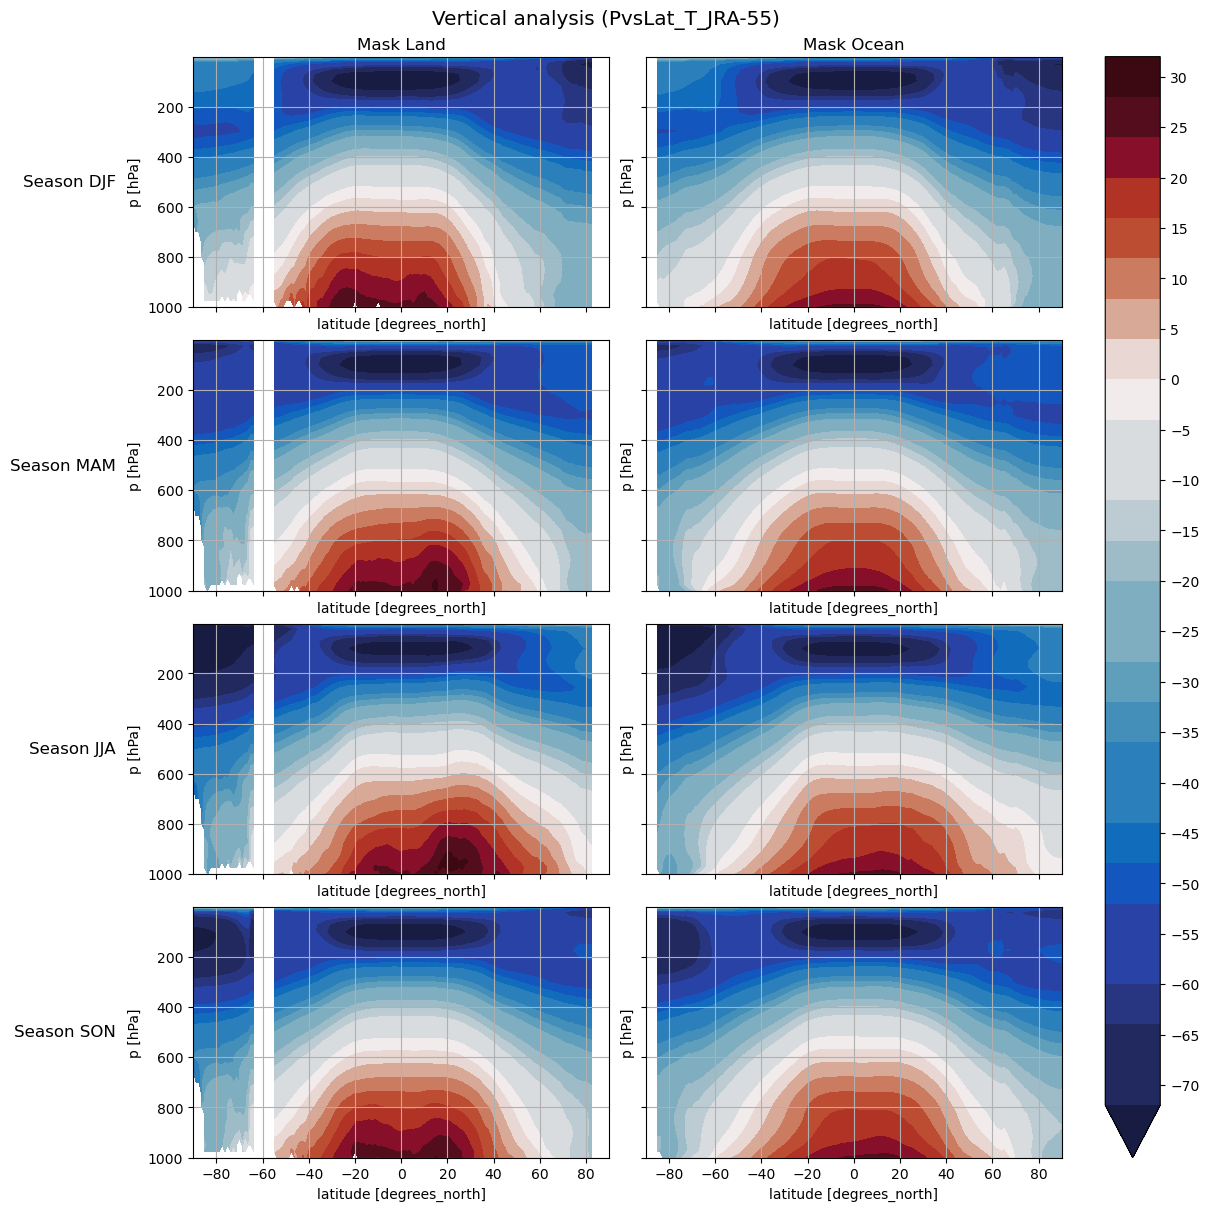

In [8]:
# =======================================================================
# Plot p vs lat, T, 


ocean=DS.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)
land=DS.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True)

fig, axes = startfig('PvsLat_T_'+SETNAME)

title='PvsLat_T_'+SETNAME

plot_T(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_T(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_T(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_T(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_T(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_T(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_T(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_T(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')


endfig(fig,axes,'PvsLat_T_'+SETNAME)

In [9]:

latbins = np.arange(-90,90,3)
tbins = np.arange(-80,30 , 10)


[########################################] | 100% Completed | 4.05 sms
Done with axes[0,0]
[########################################] | 100% Completed | 1.68 sms
Done with axes[1,0]
[########################################] | 100% Completed | 1.71 sms
Done with axes[2,0]
[########################################] | 100% Completed | 1.66 sms
Done with axes[3,0]
[########################################] | 100% Completed | 1.76 sms
Done with axes[0,1]
[########################################] | 100% Completed | 1.74 sms
Done with axes[1,1]
[########################################] | 100% Completed | 1.72 sms
Done with axes[2,1]
[########################################] | 100% Completed | 1.81 sms
Done with axes[3,1]


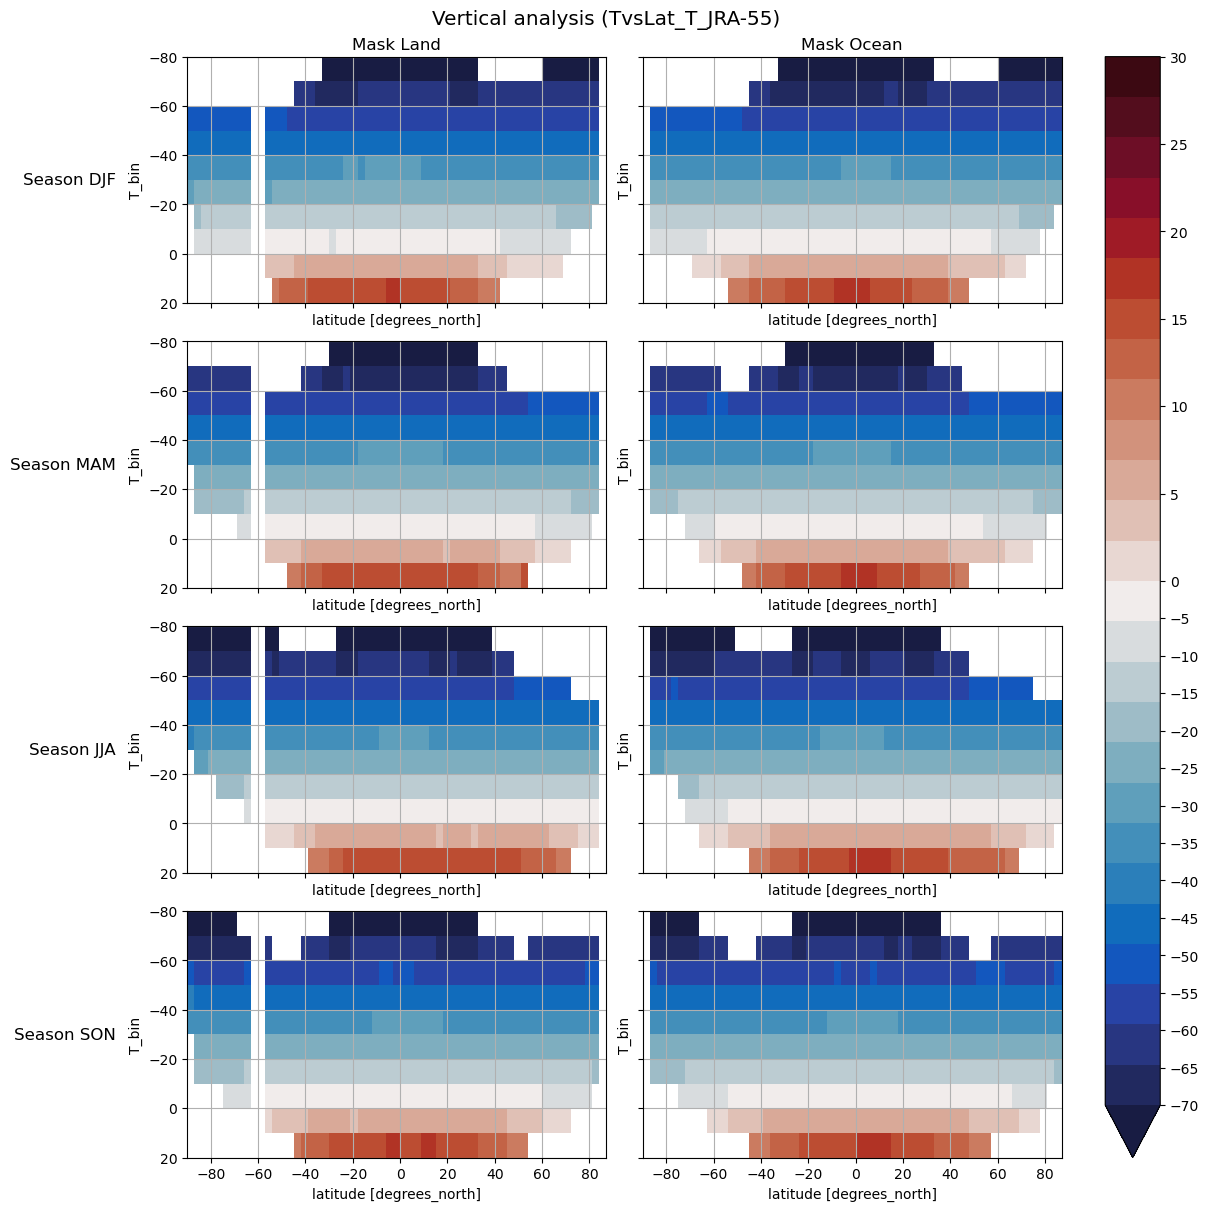

In [10]:


# =======================================================================
# Plot T vs lat, T, 

pmax=1000
pmin=1    # This should not be below 400 for some reason? Help why?

ocean=DS.ds.sel(time=slice(t1,t2),p=slice(pmax,pmin)).where(TOPO.land_mask_reindexed==False)
land=DS.ds.sel(time=slice(t1,t2),p=slice(pmax,pmin)).where(TOPO.land_mask_reindexed==True)


fig, axes = startfig('TvsLat_T_'+SETNAME)

title='TvsLat_T_'+SETNAME

plot_hist_T(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_hist_T(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_hist_T(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_hist_T(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_hist_T(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_hist_T(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_hist_T(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_hist_T(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')

endfig(fig,axes,'TvsLat_T_'+SETNAME)
    

## Temperature Change DT Plots

Done with axes[0,0]
Done with axes[1,0]
Done with axes[2,0]
Done with axes[3,0]
Done with axes[0,1]
Done with axes[1,1]
Done with axes[2,1]
Done with axes[3,1]


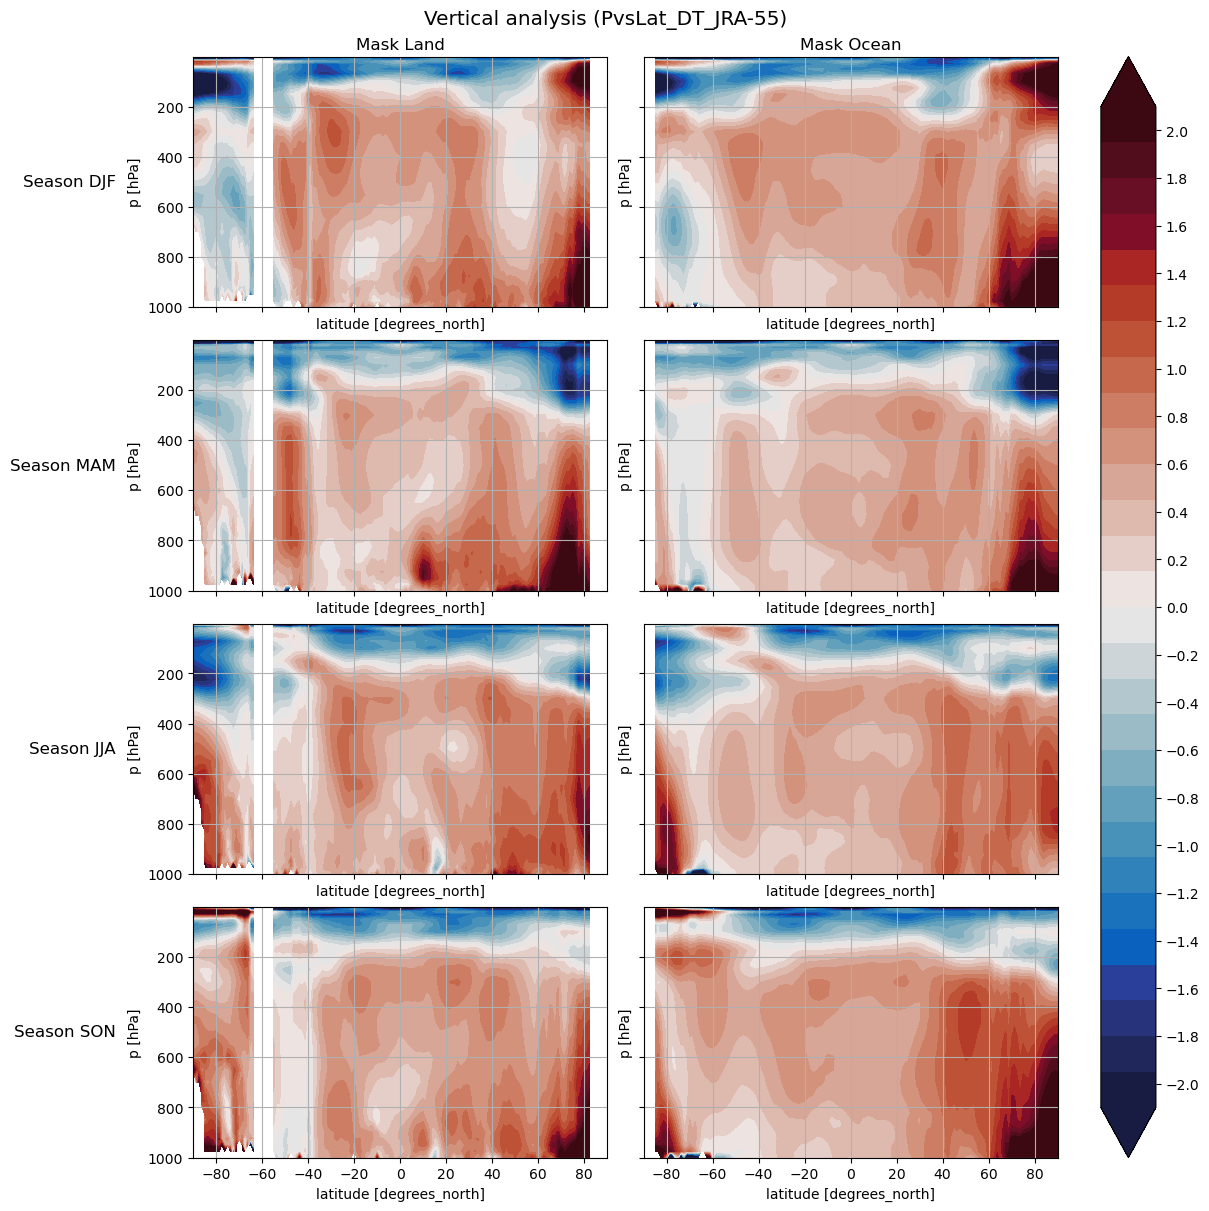

In [11]:
# =======================================================================
# Parameter fuer DT Plot

vmin = -2
vmax = 2
update_norm(vmin,vmax)
# =======================================================================
# Plot p vs lat, DT, 



fig, axes = startfig('PvsLat_DT_'+SETNAME)

data=[DS.ds.T.sel(time=slice(t2_start,t2_end)),DS.ds.T.sel(time=slice(t1_start,t1_end))]

ocean, land = seloceanland2(data)

title='PvsLat_DT_'+SETNAME

plot_T(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_T(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_T(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_T(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_T(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_T(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_T(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_T(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')

endfig(fig,axes,'PvsLat_DT_'+SETNAME)

[########################################] | 100% Completed | 4.47 sms
[########################################] | 100% Completed | 1.78 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[0,0]
[####                                    ] | 11% Completed | 103.23 ms

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 1.73 sms
[########################################] | 100% Completed | 1.75 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[1,0]
[####                                    ] | 11% Completed | 103.31 ms

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 1.75 sms
[########################################] | 100% Completed | 1.71 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[2,0]
[####                                    ] | 11% Completed | 103.30 ms

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 1.77 sms
[########################################] | 100% Completed | 1.66 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[3,0]
[####                                    ] | 11% Completed | 103.37 ms

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 1.72 sms
[########################################] | 100% Completed | 1.70 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[0,1]
[###                                     ] | 9% Completed | 103.30 ms

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 1.73 sms
[########################################] | 100% Completed | 1.76 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[1,1]
[####                                    ] | 11% Completed | 103.90 ms

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 1.72 sms
[########################################] | 100% Completed | 1.74 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[2,1]
[####                                    ] | 11% Completed | 103.52 ms

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 1.67 sms
[########################################] | 100% Completed | 1.75 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[3,1]


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


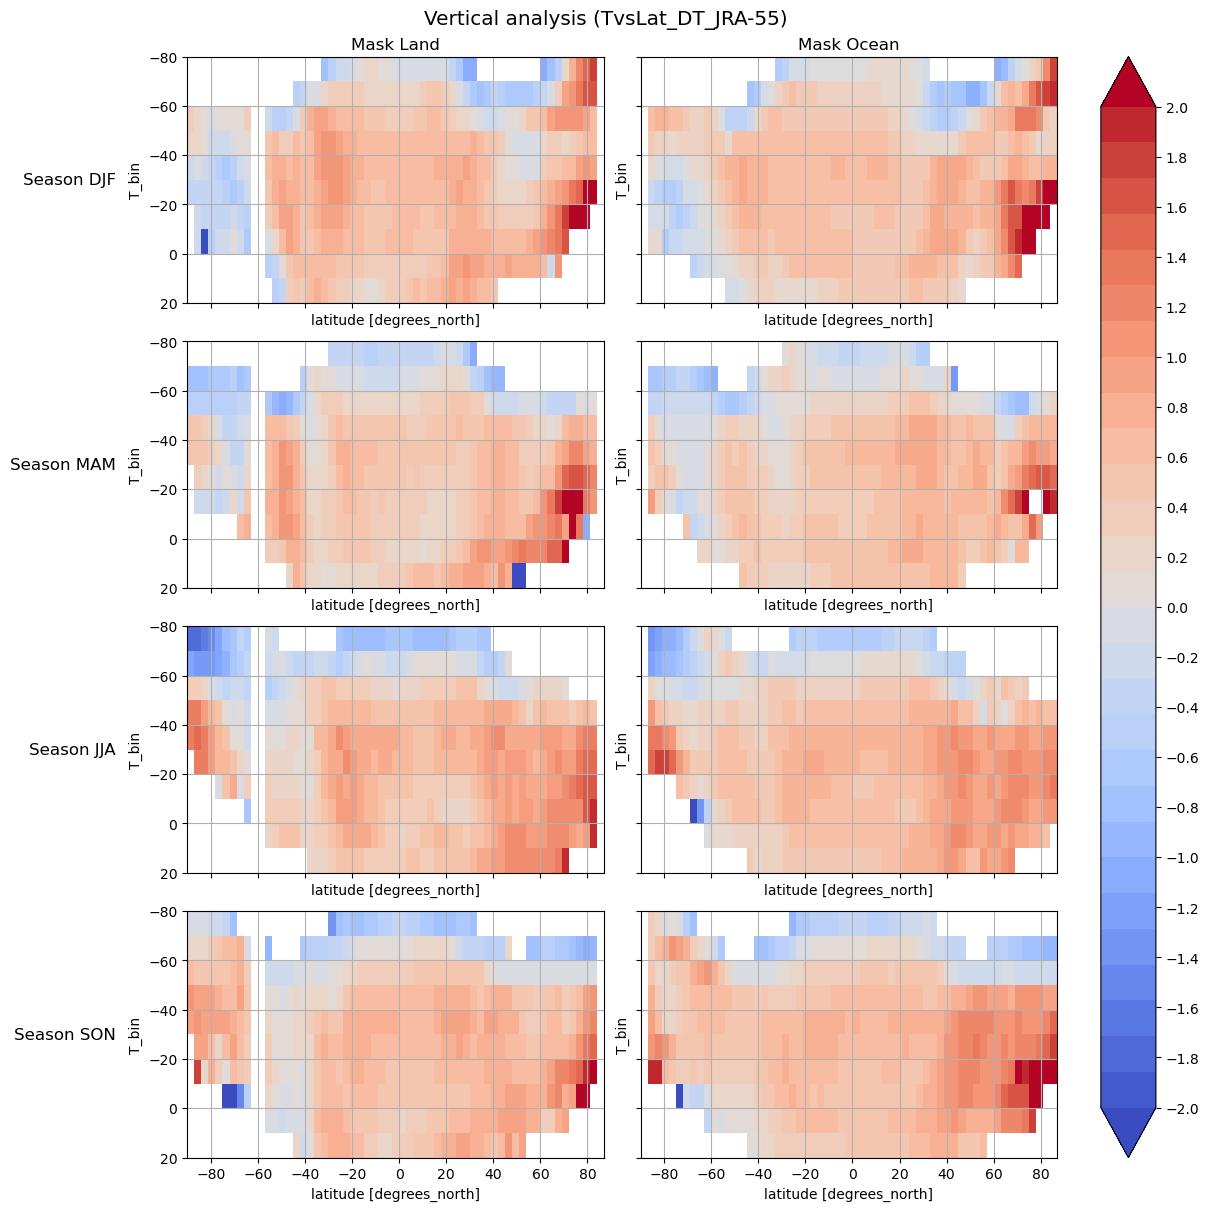

In [12]:
cmap = 'coolwarm'

# =======================================================================
# Plot T vs lat, DT, 

fig, axes = startfig('TvsLat_DT_'+SETNAME)

data=[DS.ds.sel(time=slice(t2_start,t2_end),p=slice(pmax,pmin)),DS.ds.sel(time=slice(t1_start,t1_end),p=slice(pmax,pmin))]

ocean, land = seloceanland2(data)

title='TvsLat_DT_'+SETNAME

plot_hist_T(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_hist_T(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_hist_T(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_hist_T(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_hist_T(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_hist_T(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_hist_T(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_hist_T(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')

endfig(fig,axes,'TvsLat_DT_'+SETNAME)

## Plots for RH

In [10]:
# =======================================================================
# Parameter fuer RH Plot

vmin=0
vmax=1
levels=30
cmap=cmap_RH
update_norm(vmin,vmax,0.5)

Done with axes[0,0]
Done with axes[1,0]
Done with axes[2,0]
Done with axes[3,0]
Done with axes[0,1]
Done with axes[1,1]
Done with axes[2,1]
Done with axes[3,1]


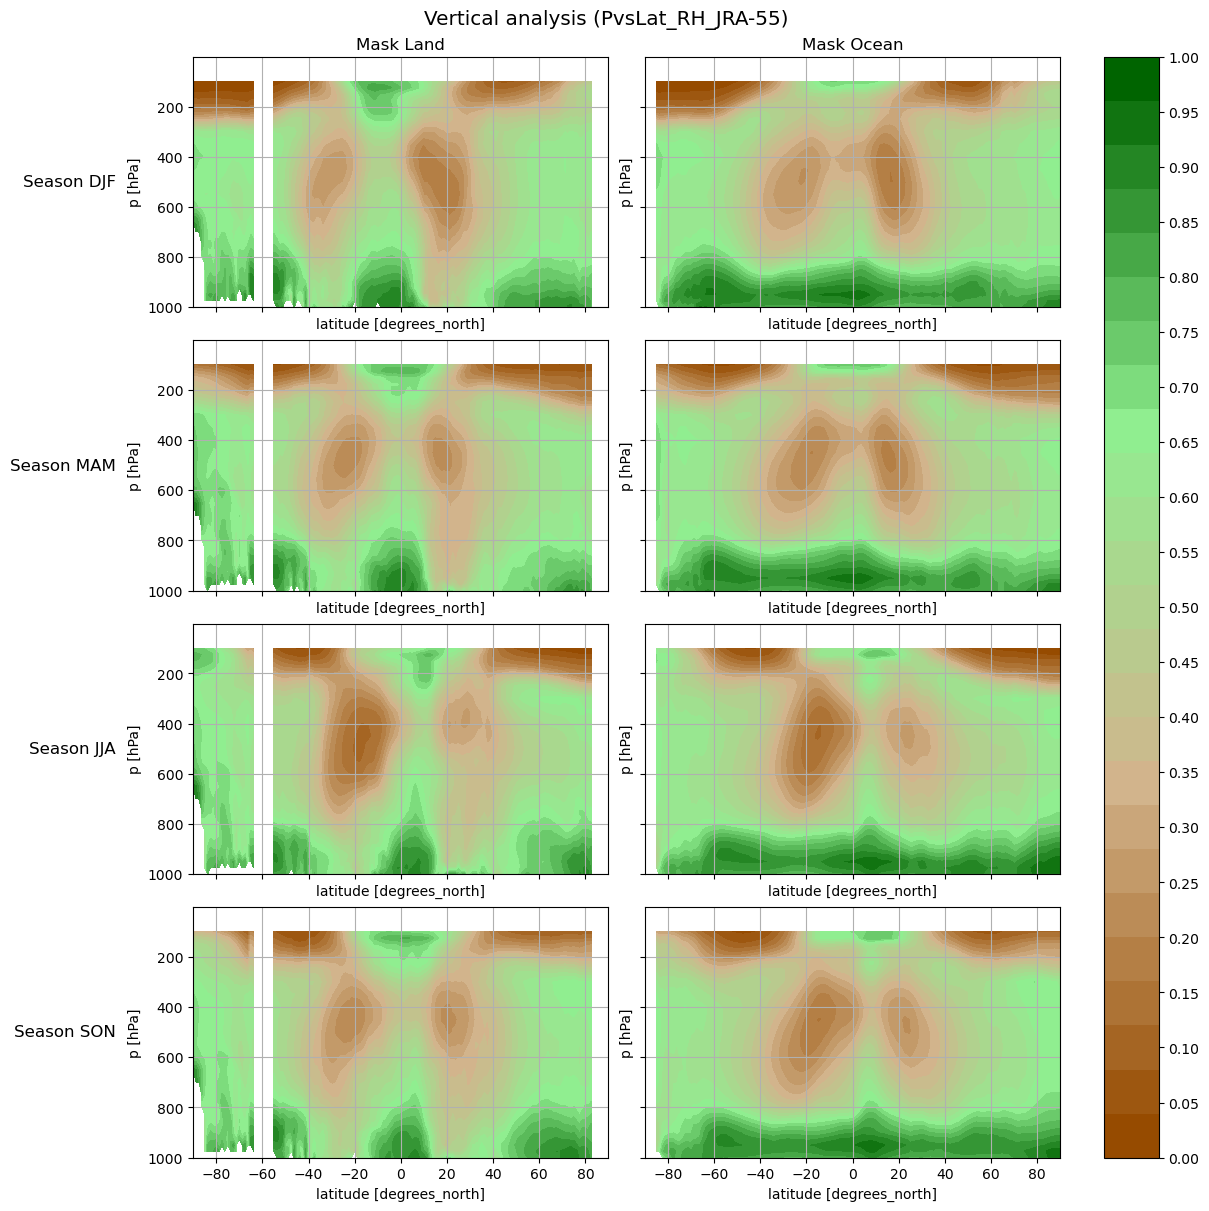

In [14]:

# =======================================================================
# Plot p vs lat, RH, 

fig, axes = startfig('PvsLat_RH_'+SETNAME)

ocean=DS.ds.RH.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)
land=DS.ds.RH.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True)

title='PvsLat_RH_'+SETNAME

plot_RH(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_RH(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_RH(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_RH(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_RH(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_RH(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_RH(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_RH(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')

endfig(fig,axes,'PvsLat_RH_'+SETNAME)

[########################################] | 100% Completed | 1.99 sms
Done with axes[0,0]
[########################################] | 100% Completed | 1.93 sms
Done with axes[1,0]
[########################################] | 100% Completed | 1.80 sms
Done with axes[2,0]
[########################################] | 100% Completed | 1.76 sms
Done with axes[3,0]
[########################################] | 100% Completed | 1.76 sms
Done with axes[0,1]
[########################################] | 100% Completed | 1.81 sms
Done with axes[1,1]
[########################################] | 100% Completed | 1.77 sms
Done with axes[2,1]
[########################################] | 100% Completed | 1.79 sms
Done with axes[3,1]


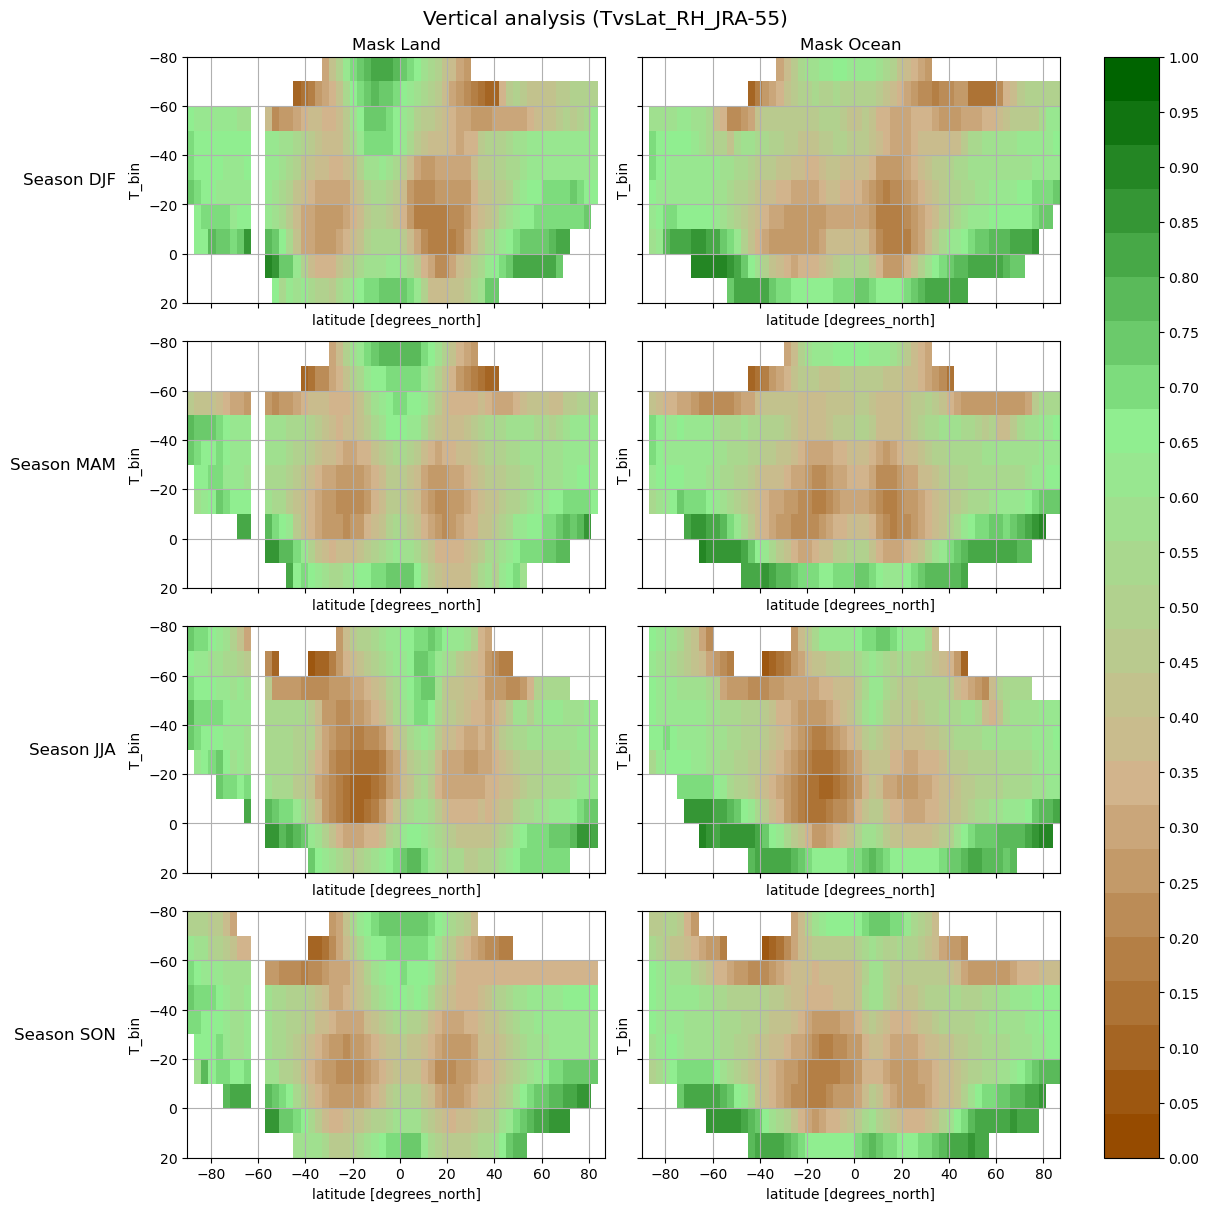

In [15]:

# =======================================================================
# Plot T vs lat, RH, 

ocean=DS.ds.sel(time=slice(t1,t2),p=slice(pmax,pmin)).where(TOPO.land_mask_reindexed==False)
land=DS.ds.sel(time=slice(t1,t2),p=slice(pmax,pmin)).where(TOPO.land_mask_reindexed==True)


fig, axes = startfig('TvsLat_RH_'+SETNAME)

title='TvsLat_RH_'+SETNAME

plot_hist_RH(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_hist_RH(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_hist_RH(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_hist_RH(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_hist_RH(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_hist_RH(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_hist_RH(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_hist_RH(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')


endfig(fig,axes,'TvsLat_RH_'+SETNAME)
    

## Plot of RH Change

In [11]:
# =======================================================================
# Parameter fuer RH Plot

vmin=-0.1
vmax=0.1
update_norm(vmin,vmax)
cmap = cmap_RH_change

Done with axes[0,0]
Done with axes[1,0]
Done with axes[2,0]
Done with axes[3,0]
Done with axes[0,1]
Done with axes[1,1]
Done with axes[2,1]
Done with axes[3,1]


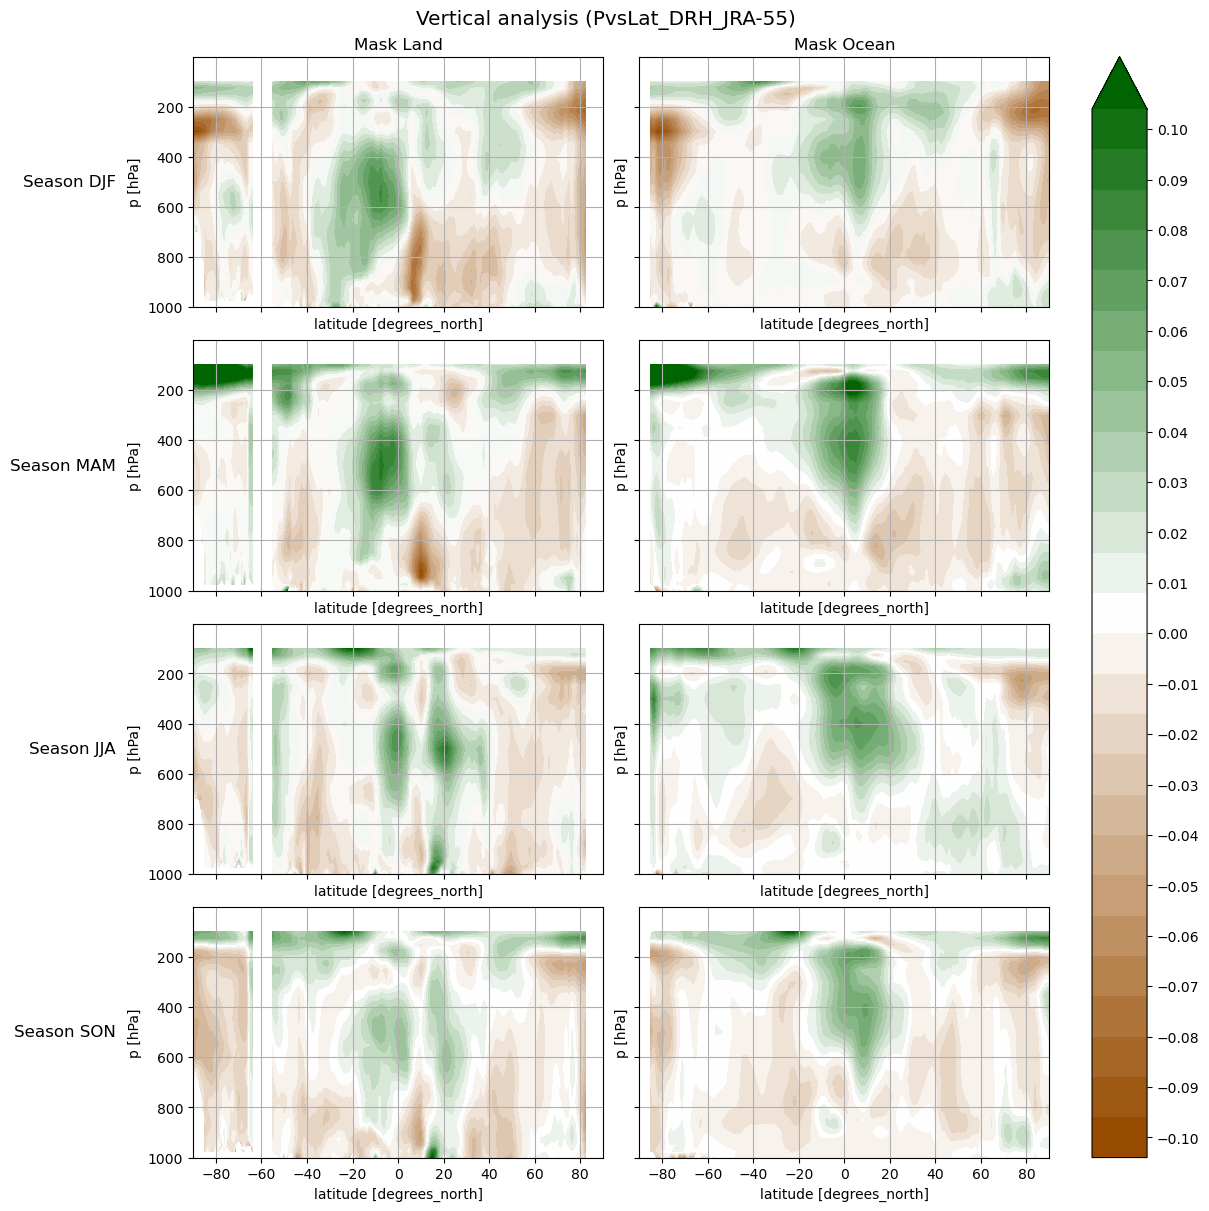

In [12]:

# =======================================================================
# Plot p vs lat, DRH,



fig, axes = startfig('PvsLat_DRH_'+SETNAME)

data=[DS.ds.RH.sel(time=slice(t2_start,t2_end)),DS.ds.RH.sel(time=slice(t1_start,t1_end))]

ocean, land = seloceanland2(data)

title='PvsLat_DRH_'+SETNAME

plot_RH(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_RH(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_RH(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_RH(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_RH(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_RH(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_RH(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_RH(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')




endfig(fig,axes,'PvsLat_DRH_'+SETNAME)

[########################################] | 100% Completed | 3.10 sms
[########################################] | 100% Completed | 3.88 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[0,0]
[########################################] | 100% Completed | 1.61 sms
[########################################] | 100% Completed | 1.62 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[1,0]
[########################################] | 100% Completed | 1.62 sms
[########################################] | 100% Completed | 1.66 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[2,0]
[########################################] | 100% Completed | 1.64 sms
[########################################] | 100% Completed | 1.62 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[3,0]
[########################################] | 100% Completed | 1.63 sms
[########################################] | 100% Completed | 1.63 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[0,1]
[########################################] | 100% Completed | 1.62 sms
[########################################] | 100% Completed | 1.74 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[1,1]
[########################################] | 100% Completed | 1.63 sms
[########################################] | 100% Completed | 1.61 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[2,1]
[########################################] | 100% Completed | 1.65 sms
[########################################] | 100% Completed | 1.71 sms


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Done with axes[3,1]


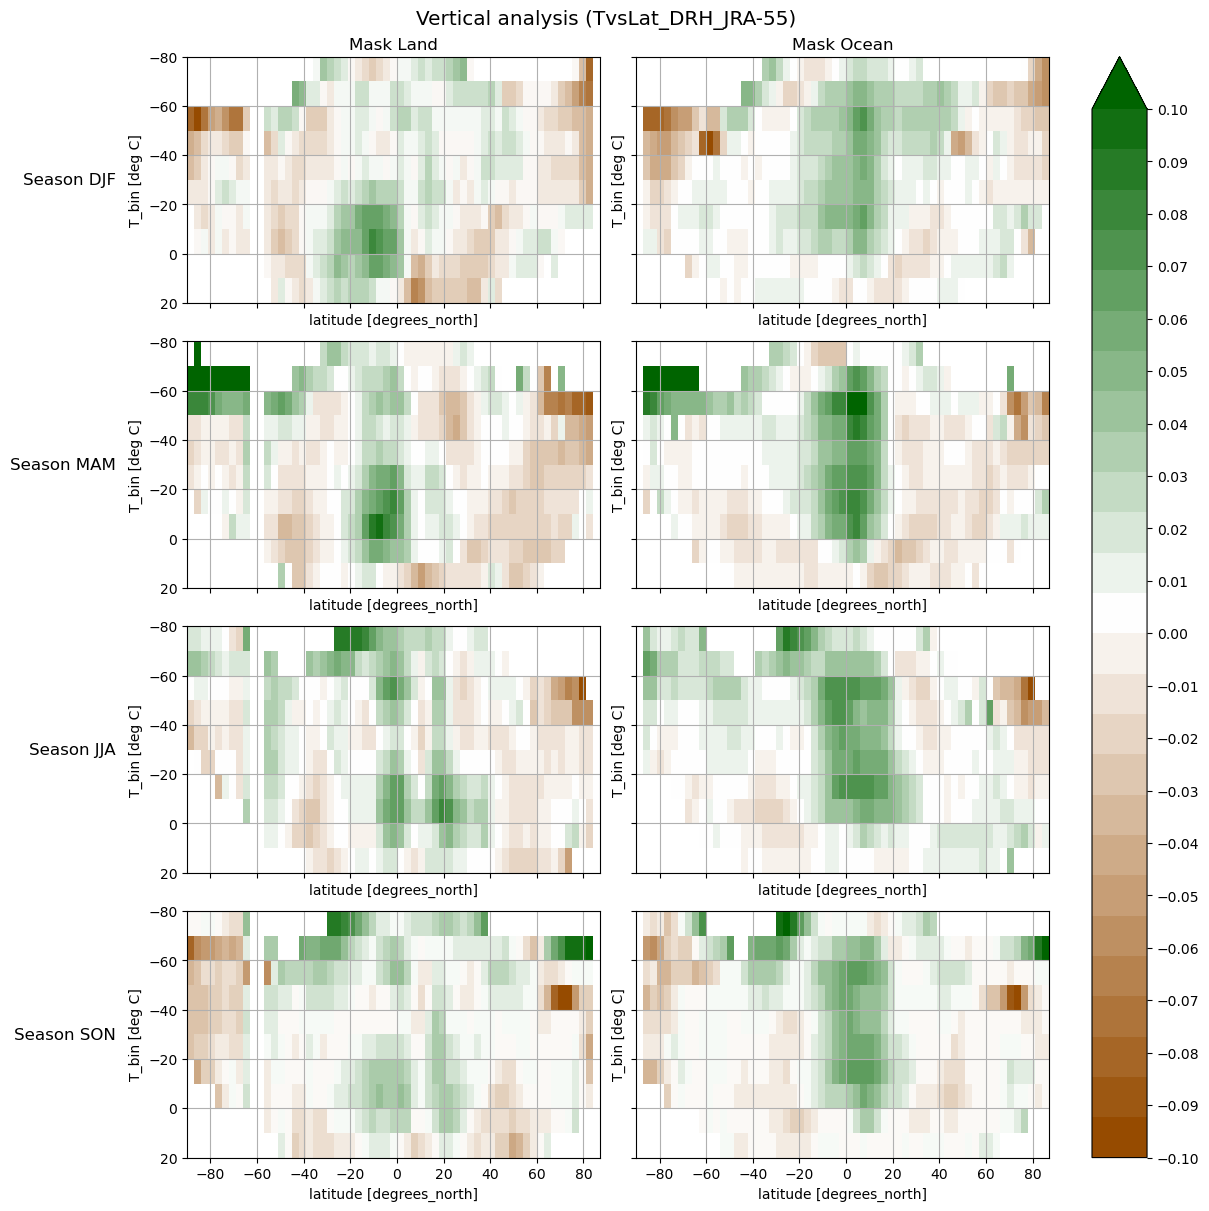

In [21]:

# =======================================================================
# Plot T vs lat, DRH,
pmax=1000
pmin=10


fig, axes = startfig('TvsLat_DRH_'+SETNAME)

data=[DS.ds.sel(time=slice(t2_start,t2_end),p=slice(pmax,pmin)),DS.ds.sel(time=slice(t1_start,t1_end),p=slice(pmax,pmin))]

ocean, land = seloceanland2(data)

title='TvsLat_DRH_'+SETNAME

plot_hist_RH(land,DJF,0,0).to_netcdf(path=INT_RES+title+'_0,0_land,DJF.nc')
plot_hist_RH(land,MAM,1,0).to_netcdf(path=INT_RES+title+'_1,0_land,MAM.nc')
plot_hist_RH(land,JJA,2,0).to_netcdf(path=INT_RES+title+'_2,0_land,JJA.nc')
plot_hist_RH(land,SON,3,0).to_netcdf(path=INT_RES+title+'_3,0_land,SON.nc')
plot_hist_RH(ocean,DJF,0,1).to_netcdf(path=INT_RES+title+'_0,1_ocean,DJF.nc')
plot_hist_RH(ocean,MAM,1,1).to_netcdf(path=INT_RES+title+'_1,1_ocean,MAM.nc')
plot_hist_RH(ocean,JJA,2,1).to_netcdf(path=INT_RES+title+'_2,1_ocean,JJA.nc')
plot_hist_RH(ocean,SON,3,1).to_netcdf(path=INT_RES+title+'_3,1_ocean,SON.nc')

endfig(fig,axes,'TvsLat_DRH_'+SETNAME)
    